# **Exploring the Diamond Dataset** #

***Author: Daniel Marrama***

## Introduction ##
This kernel begins my real journey as a Kaggler as I attempt to explore a dataset and create visualizations using **Python**. I am still relatively new to data science, so this will be a learning process for me as well. I picked this dataset to start because there is only one csv file to work with and there isn't a crazy amount of features for each sample. I've been reading through other Kaggle kernels for inspiration and hope to improve my skills by doing my own. Any feedback is appreciated and I thank you in advance.

To start, we will load in the data, take a peek at it, clean it if necessary and then perform some basic analysis in order to get some possible insight.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("husl")

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Read in the data using pd.read_csv
# The first column is the index column, so we will set the index to that column
data = pd.read_csv('diamonds.csv',index_col=0)
data.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
31456,0.34,Premium,E,SI1,59.6,57.0,765,4.61,4.52,2.72
19676,1.51,Ideal,G,SI1,61.6,56.0,8283,7.34,7.25,4.50
19708,0.28,Good,E,VS2,63.7,60.0,625,4.23,4.18,2.68


Let's look to see if we have any missing values at all and we will deal with those appropriately.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Wow, there appears to be no missing data points, this is another reason why this is a good dataset to start with as a beginner. Of course, in the real world, most of the time we will not have datasets like this, so it is good to practice with other data that needs to be cleaned up.

To simplify this data set a bit more, let's combine the 'x', 'y' and 'z' columns into a 'volume' column. We'll also remove any outliers above 1000mm^3.

In [3]:
data['volume'] = data['x']*data['y']*data['z']
data.drop(['x','y','z'],axis=1,inplace=True)
data = data[data['volume']<1000]
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'volume'],
      dtype='object')

Next, let's look at some distributions of the carat, depth, price and volume columns using matplotlib. We will use seaborn later, just to be able to experiment with both libraries at bit.

Text(0.5, 1.0, 'Distribution of Diamond Volume')

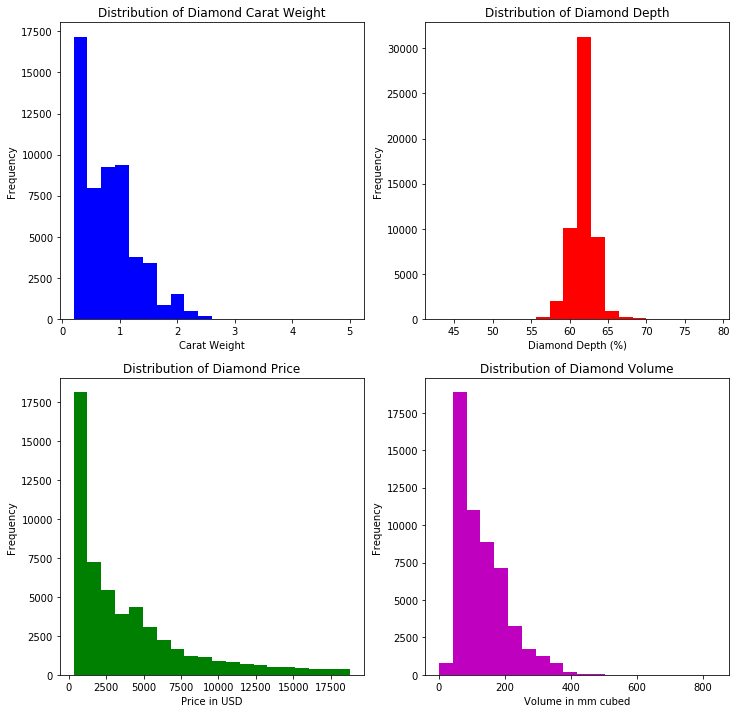

In [4]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(data['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(data['price'],bins=20,color='g')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(data['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

The depth percentage of the diamond is the depth from the table to the cutlet (point of the diamond) relative to the width and length of the diamond. It makes sense that the depth percentage is around 60% for most diamonds because otherwise, it would be strange to have a deep depth or a shallow depth and it would be hard to seat a diamond in a ring whose depth is small.

It also makes sense that the volume and carat weight are almost overlapped equally.

Let's look at some comparison's with some features of the diamond and with the price of it using the seaborn library.

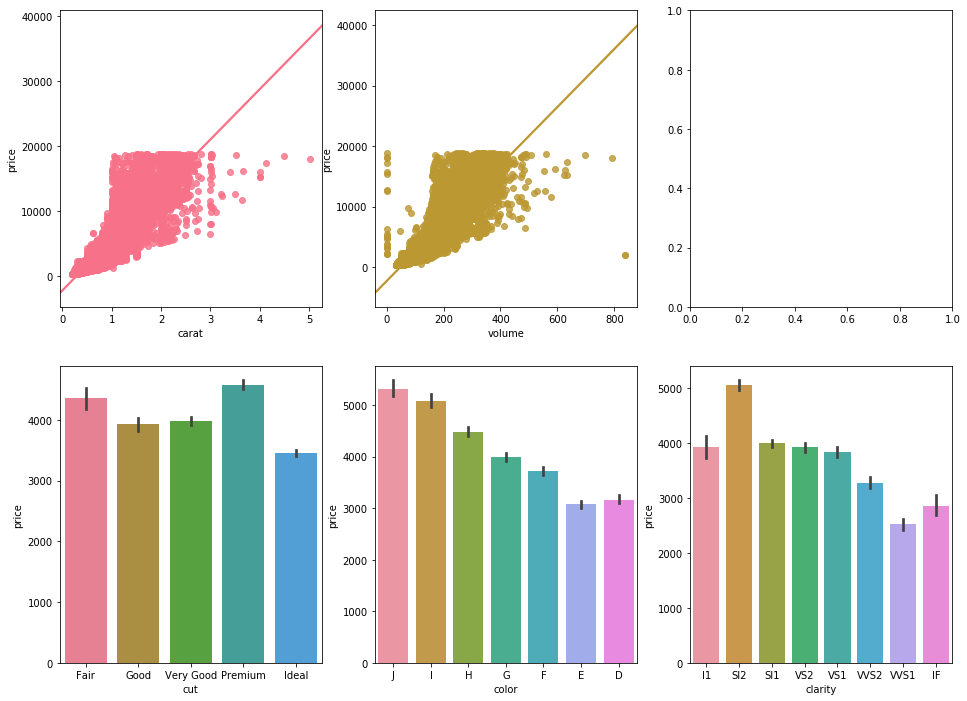

In [5]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.regplot(x = 'carat', y = 'price', data=data, ax = saxis[0,0])
sns.regplot(x = 'volume', y = 'price', data=data, ax = saxis[0,1])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=data, ax = saxis[1,0])
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=data, ax = saxis[1,1])
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=data, ax = saxis[1,2])


Generally, the price increases as carat weight and volume increase and this makes sense. However, it is strange that as the qualities of cut, color and clarity of a diamond increase, the price does not increase. This may be because diamonds high in quality in one of these attributes may be poor quality in another.

Because of this, what we will do next might be a stretch, but let's normalize the cut, color and clarity columns and then add them all up to achieve a "diamond score". Then we will graph the score compared with the price and see if there is an increase based on the score.

First, we will have to convert these columns to integers instead of the strings that are already within them.

In [6]:
# These look very ugly, but I'm not sure how else to do this
# I tried using the LabelEncoder method from scikit-learn preprocessing
# but I'm not sure how to label them based on order
data['cut'] = data['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' 
                                           else(3 if x=='Very Good' 
                                           else(4 if x=='Premium' else 5))))

data['color'] = data['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' else 7))))))

data['clarity'] = data['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))

Next, let's normalize the data using the MinMaxScaler method from scikitlearn.preprocessing. Then we will create a 'diamond score' column based on the cut quality, color and clarity of the diamond. We will then graph the diamond score against the price and see if there is a positive trend.

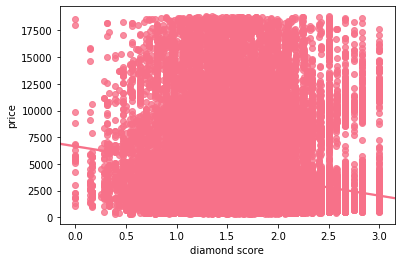

In [7]:
scaler = MinMaxScaler()
data[['cut','color','clarity']] = scaler.fit_transform(data[['cut','color','clarity']])

data['diamond score'] = data['cut'] + data['color'] + data['clarity']

sns.regplot(x = 'diamond score', y = 'price', data=data)

This is very interesting. The data has a lot of variance, but the best fit line appears to be negative. I wonder if there are some organizations that overprice their diamonds and it is affecting the trend of the data. 

Let's do an obligatory correlation heatmap just to see if there is a strong correlation with any features that aren't obvious now that they are all in numerical format.

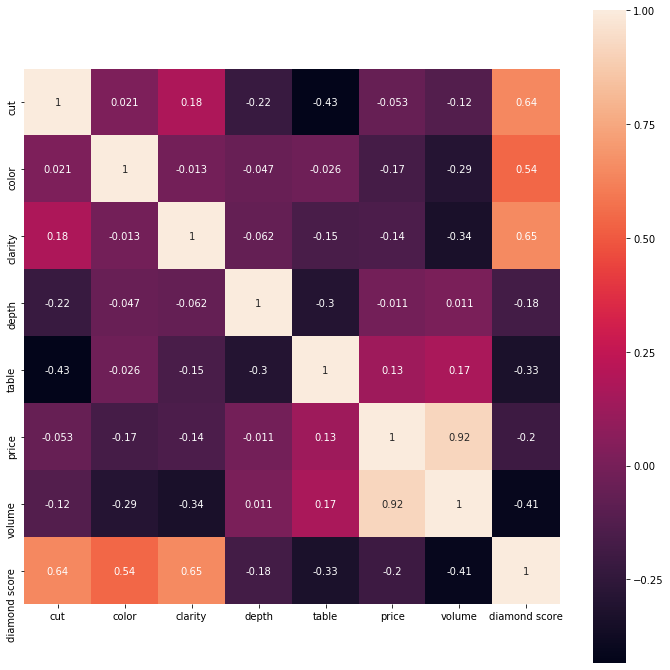

In [8]:
plt.figure(figsize=(12, 12))
correlation = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

Hmm, there doesn't seem to be anything too strong that we wouldn't already have guessed. Anyhow, let's move on and do some basic MLA on the dataset just for the fun of it. We will split the data up and use the latter end of it as our 'test' set. We will then use the first set to train our model and the test data to predict prices after we've dropped the 'price' column.

In [9]:
test_data = data.iloc[-round(len(data)*.1):].copy()
data.drop(data.index[-round(len(data)*.1):],inplace=True)
test_data.drop('price',1,inplace=True)
print(data.shape)
print(test_data.shape)

(48545, 9)
(5394, 8)


Let's load in a few ML algorithms from scikit-learn to run on this dataset. We'll include linear regression (for single variable regression) and ridge regression, LASSO and Elastic Net (for multivariable regression). I'm not too well versed in how to set the parameters for these models (I will be learning this soon), so for now I'm going to stick very closely to the default settings.

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_validation import train_test_split

X = data.drop(['price'],1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Linear regression accuracy: ', linear_regression.score(X_test,y_test))

ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
print('Ridge regression accuracy: ',ridge.score(X_test,y_test))

lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
print('Lasso regression accuracy: ',ridge.score(X_test,y_test))

elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)
print('Elastic net accuracy: ',elastic_net.score(X_test,y_test))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

Just for fun, I'm gonna plot the price prediction for each model against the diamond score and maybe we'll see a large difference graphically for each model.

In [ ]:
plt.figure(figsize=[12,12])

# Linear regression model
plt.subplot(221)
plt.scatter(test_data['diamond score'],linear_regression.predict(test_data),color='lightcoral')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Linear Regression Model')

# Ridge regression model
plt.subplot(222)
plt.scatter(test_data['diamond score'],ridge.predict(test_data),color='royalblue')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Ridge Regression Model')

# Lasso regression model
plt.subplot(223)
plt.scatter(test_data['diamond score'],lasso.predict(test_data),color='lightgreen')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Lasso Regression Model')

# Elastic net model
plt.subplot(224)
plt.scatter(test_data['diamond score'],elastic_net.predict(test_data),color='orange')
plt.ylim(0,8000)
plt.xlabel('Diamond Score')
plt.ylabel('Price in USD')
plt.title('Elastic Net Model')

It seems the models actually look pretty different and they clearly differ in slope. I'll have to learn about each algorithm a bit more to see why this is.

That's all I have for now. If anyone has suggestions about what to add to this kernel or if you identify any mistakes, please let me know. I'm here to learn and like I said in the beginning, any and all feedback is welcome. :)

Thanks for spending the time to read through it!